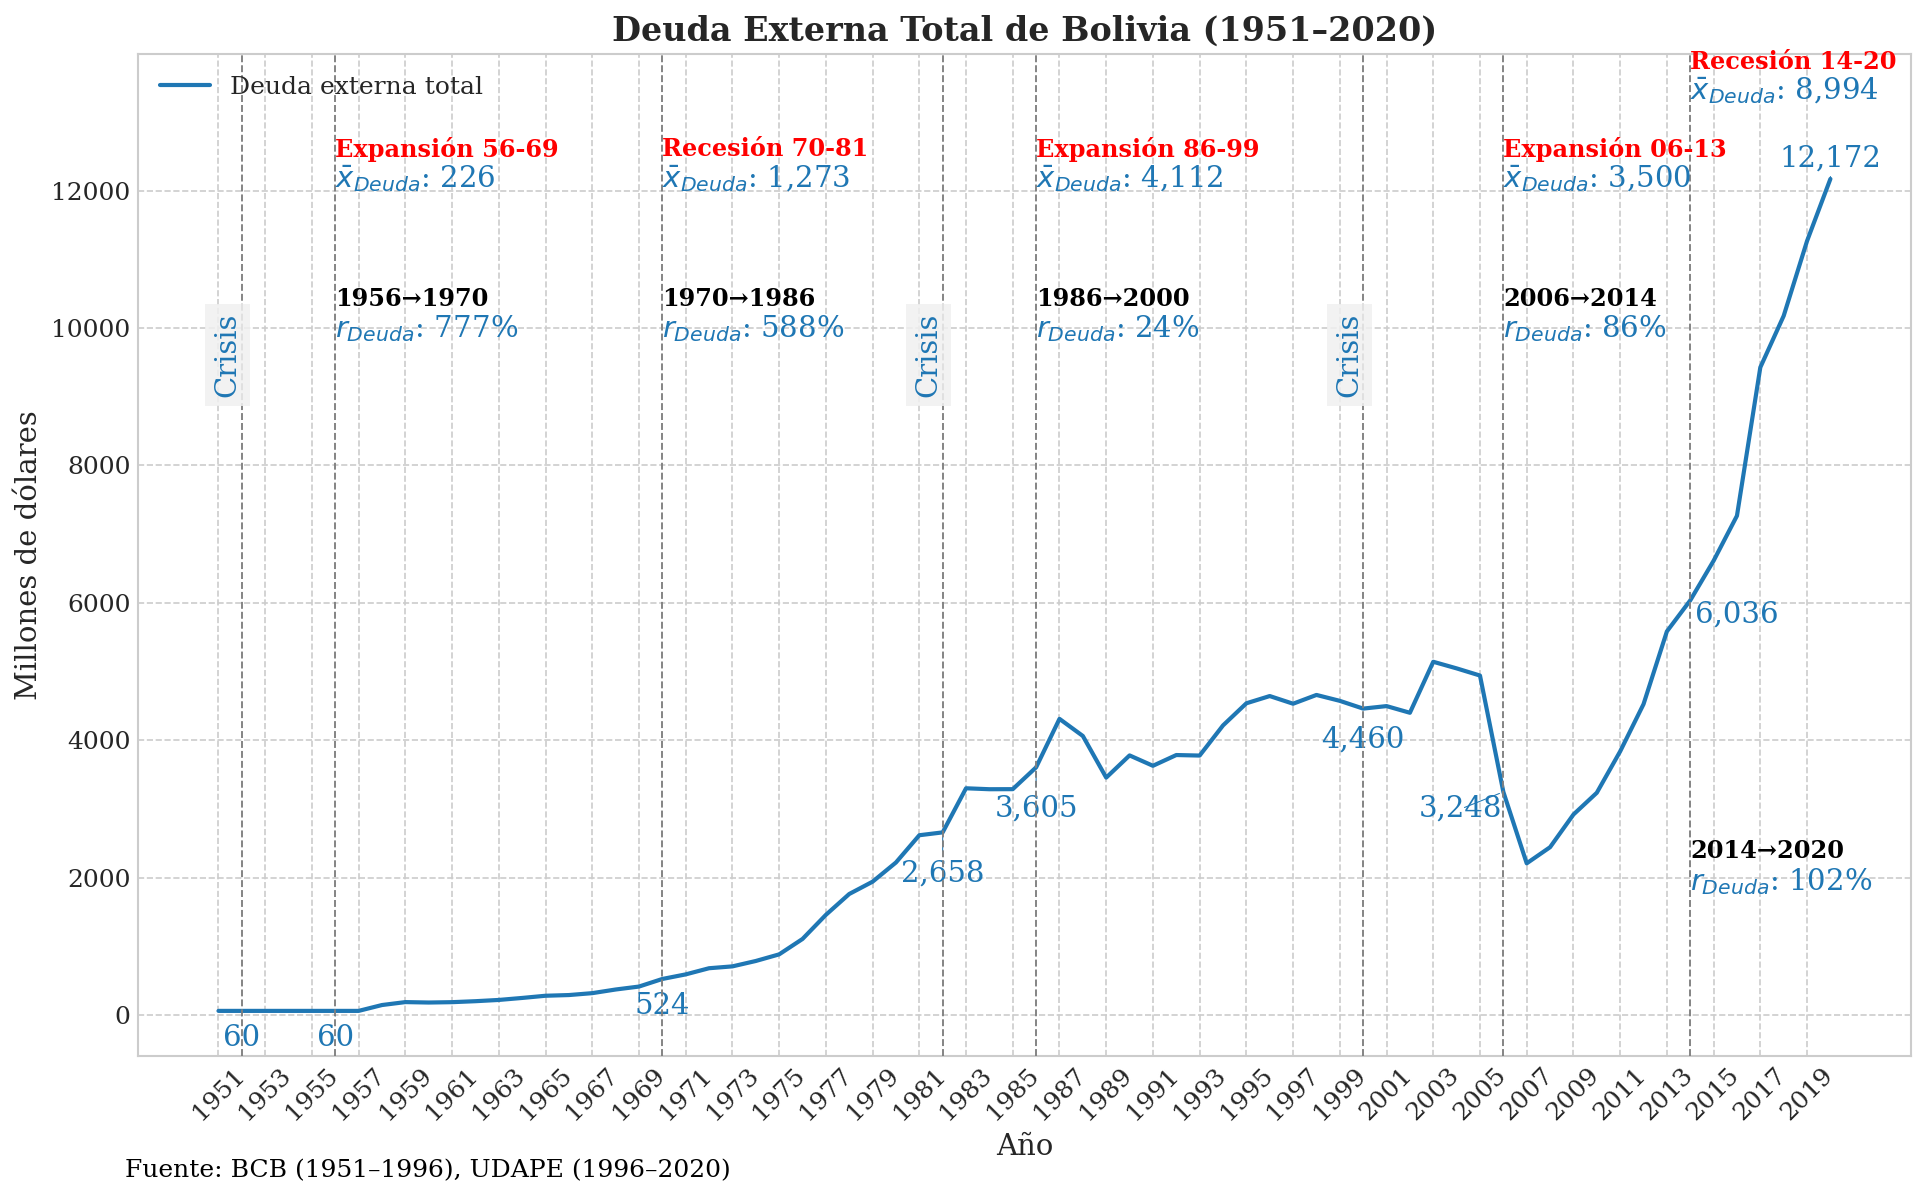

In [21]:
# ─────────────────────────────────────────────────────────────────────
# Importaciones
# ─────────────────────────────────────────────────────────────────────
import sys, os, sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Añadir ruta para utils propios
sys.path.append(os.path.abspath('../'))
from graficos_utils import *
from config import *  # trae CYCLES, annot_years, periodos_tasas, hitos_v …

# ─────────────────────────────────────────────────────────────────────
# Configuración general
# ─────────────────────────────────────────────────────────────────────
output_dir = "../../../../assets/tesis/serie_completa/deuda_externa"
os.makedirs(output_dir, exist_ok=True)
set_style()

# ─────────────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────────────
with sqlite3.connect('../../../../db/proyectomacro.db') as conn:
    df = (
        pd.read_sql('SELECT * FROM deuda_externa_total', conn)
          .set_index('año')
          .sort_index()
    )

# ─────────────────────────────────────────────────────────────────────
# Componentes y abreviaturas (un solo componente)
# ─────────────────────────────────────────────────────────────────────
componentes = [
    ('deuda', 'Deuda externa total'),
]
cols_componentes = ['deuda']
abbr_map = {'deuda': 'Deuda'}

# ─────────────────────────────────────────────────────────────────────
# Preparación
# ─────────────────────────────────────────────────────────────────────
annotate_years   = adjust_annot_years(df, annot_years)
CYCLES           = adjust_cycles(df, CYCLES)
cycle_stats      = {n: df.loc[sli, cols_componentes].mean().to_dict()
                    for n, sli in CYCLES.items()}
periodos         = adjust_periods(df, periodos_tasas)

custom_colors = {'deuda': '#1f77b4'}

# ─────────────────────────────────────────────────────────────────────
# Offsets (adaptados a la serie de deuda)
# ─────────────────────────────────────────────────────────────────────
annotation_offsets = {
    'deuda': {
        1952: (0, -400),
        1956: (0, -400),
        1970: (0, -400),
        1982: (0, -600),
        1986: (0, -600),
        2000: (0, -450),
        2006: (-1.83, -250),
        2014: (2, -200),
        2020: (0, 300),
    },
}

hitos_offset = {a: 0.8 for a in hitos_v}

medias_offsets = {
    'Expansión 56-69':   (1956, 1),
    'Recesión 70-81':    (1970, 1),
    'Expansión 86-99':   (1986, 1),
    #'Crisis 00-05':      (2000, 1),
    'Expansión 06-13':   (2006, 1),
    'Recesión 14-20':    (2014, 1.1),
}

tasas_offsets = {
    '1956-1970': (1956, 0.83),
    '1970-1986': (1970, 0.83),
    '1986-2000': (1986, 0.83),
    #'2000-2006': (2003, 0.83),
    '2006-2014': (2006, 0.83),
    '2014-2020': (2014, 0.2),
}

# ─────────────────────────────────────────────────────────────────────
# Gráfica
# ─────────────────────────────────────────────────────────────────────
fig, ax = init_base_plot(
    df,
    componentes,
    custom_colors,
    "Deuda Externa Total de Bolivia (1951–2020)",
    "Año",
    "Millones de dólares",
    source_text="Fuente: BCB (1951–1996), UDAPE (1996–2020)"
)

add_hitos(ax, df.index, hitos_v, hitos_offset, line_kwargs={'linewidth': 0.9})

add_cycle_means_multi(
    ax, cycle_stats, medias_offsets,
    abbr_map, custom_colors,
    line_spacing=ax.get_ylim()[1] * 0.03
)

add_year_value_annotations(
    ax, df, annotate_years,
    cols_componentes, annotation_offsets,
    custom_colors, arrow_lw=0.5
)

add_period_growth_annotations_multi(
    ax, df, periodos,
    cols_componentes, tasas_offsets,
    custom_colors, abbr_map
)
# Margen inferior para valores negativos en offset (si se usan) y margen superior
ax.set_ylim(-600, df['deuda'].max() * 1.15)

plt.savefig(os.path.join(output_dir, "deuda_externa_total.png"))
plt.show()

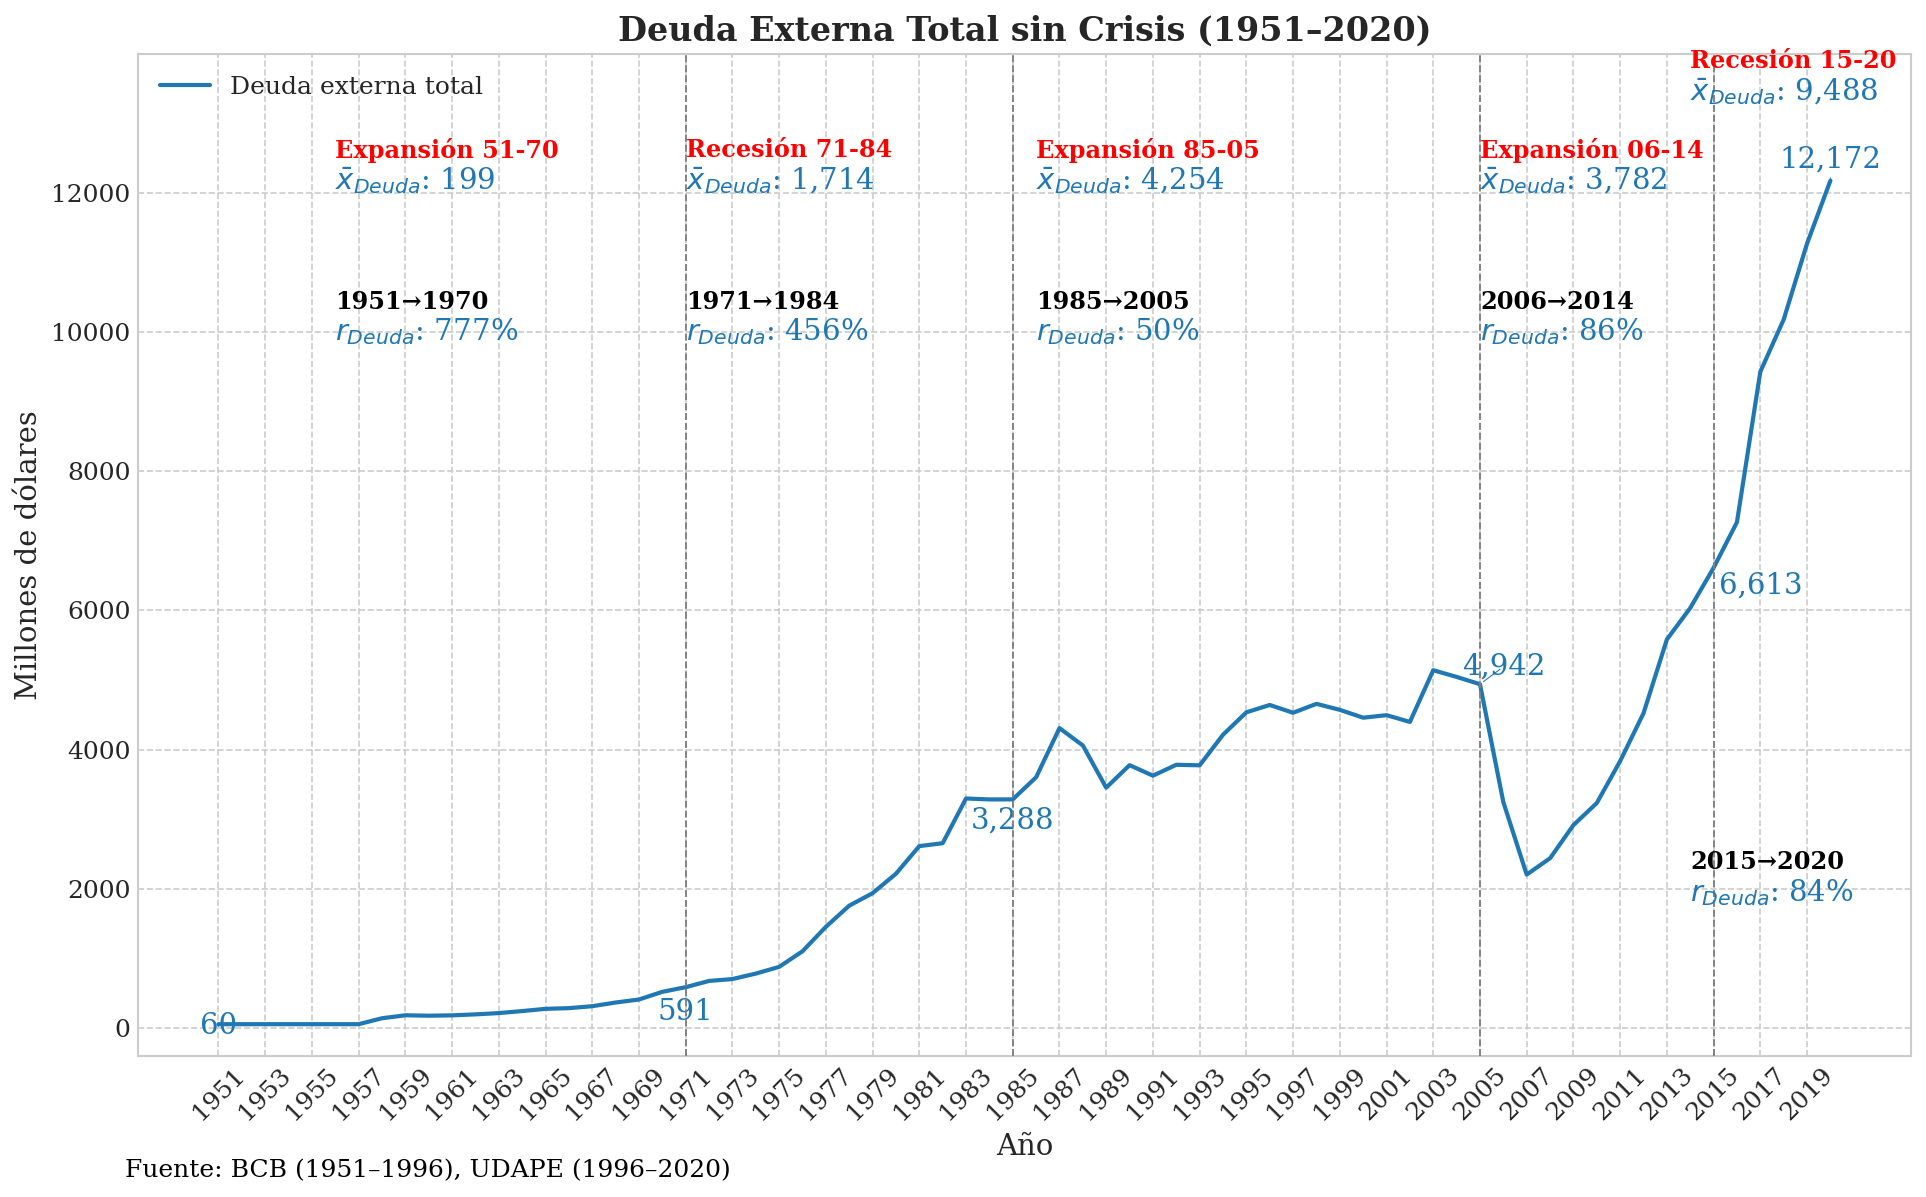

In [34]:
# ─────────────────────────────────────────────────────────────────────
# Preparación “sin crisis”
# ─────────────────────────────────────────────────────────────────────
# 1) Años anotados
annotate_years_sin_crisis = adjust_annot_years(df, annot_years_sin_crisis)
# 2) Ciclos sin crisis
CYCLE_SC = adjust_cycles(df, CYCLES_SIN_CRISIS)
cycle_stats_sin_crisis= {
    name: df.loc[period, cols_componentes].mean().to_dict()
    for name, period in CYCLE_SC.items()
} 
# 3) Periodos para tasas sin crisis
periodos_sin_crisis = adjust_periods(df, periodos_tasas_sin_crisis)


# ─────────────────────────────────────────────────────────────────────
# Offsets “sin crisis”
# ─────────────────────────────────────────────────────────────────────
annotation_offsets_sin_crisis = {
    'deuda': {
        1951: (0, -30),
        1971: (0, -350),
        1985: (0, -300),
        2005: (1, 250),
        2015: (2, -260),
        2020: (0, 300),
    },
}
hitos_offset_sin_crisis = {y: 0.8 for y in hitos_v_sin_crisis}
medias_offsets_sin_crisis = {
    'Expansión 51-70':   (1956, 1),
    'Recesión 71-84':    (1971, 1),
    'Expansión 85-05':   (1986, 1),
    'Expansión 06-14':   (2005, 1),
    'Recesión 15-20':    (2014, 1.1),
}
tasas_offsets_sin_crisis = {
    '1951-1970': (1956, 0.83),
    '1971-1984': (1971, 0.83),
    '1985-2005': (1986, 0.83),
    '2006-2014': (2005, 0.83),
    '2015-2020': (2014, 0.2),
}


# ─────────────────────────────────────────────────────────────────────
# Gráfica “sin crisis”
# ─────────────────────────────────────────────────────────────────────
fig, ax = init_base_plot(
    df,
    componentes,
    custom_colors,
    "Deuda Externa Total sin Crisis (1951–2020)",
    "Año",
    "Millones de dólares",
    source_text="Fuente: BCB (1951–1996), UDAPE (1996–2020)"
)

add_hitos(
    ax, df.index, hitos_v_sin_crisis, hitos_offset_sin_crisis,
    line_kwargs={'linewidth': 0.9}
)
add_cycle_means_multi(
    ax,cycle_stats_sin_crisis, medias_offsets_sin_crisis,
    abbr_map, custom_colors,
    line_spacing=ax.get_ylim()[1] * 0.03
)
add_year_value_annotations(
    ax, df,
    annotate_years_sin_crisis,
    cols_componentes,
    annotation_offsets_sin_crisis,
    custom_colors,
    arrow_lw=0.5
)

add_period_growth_annotations_multi(
    ax, df,
    periodos_sin_crisis,
    cols_componentes,
    tasas_offsets_sin_crisis,
    custom_colors,
    abbr_map
)


ax.set_ylim(-400, df['deuda'].max() * 1.15)
plt.savefig(os.path.join(output_dir, "deuda_externa_total_sin_crisis.png"))
plt.show()

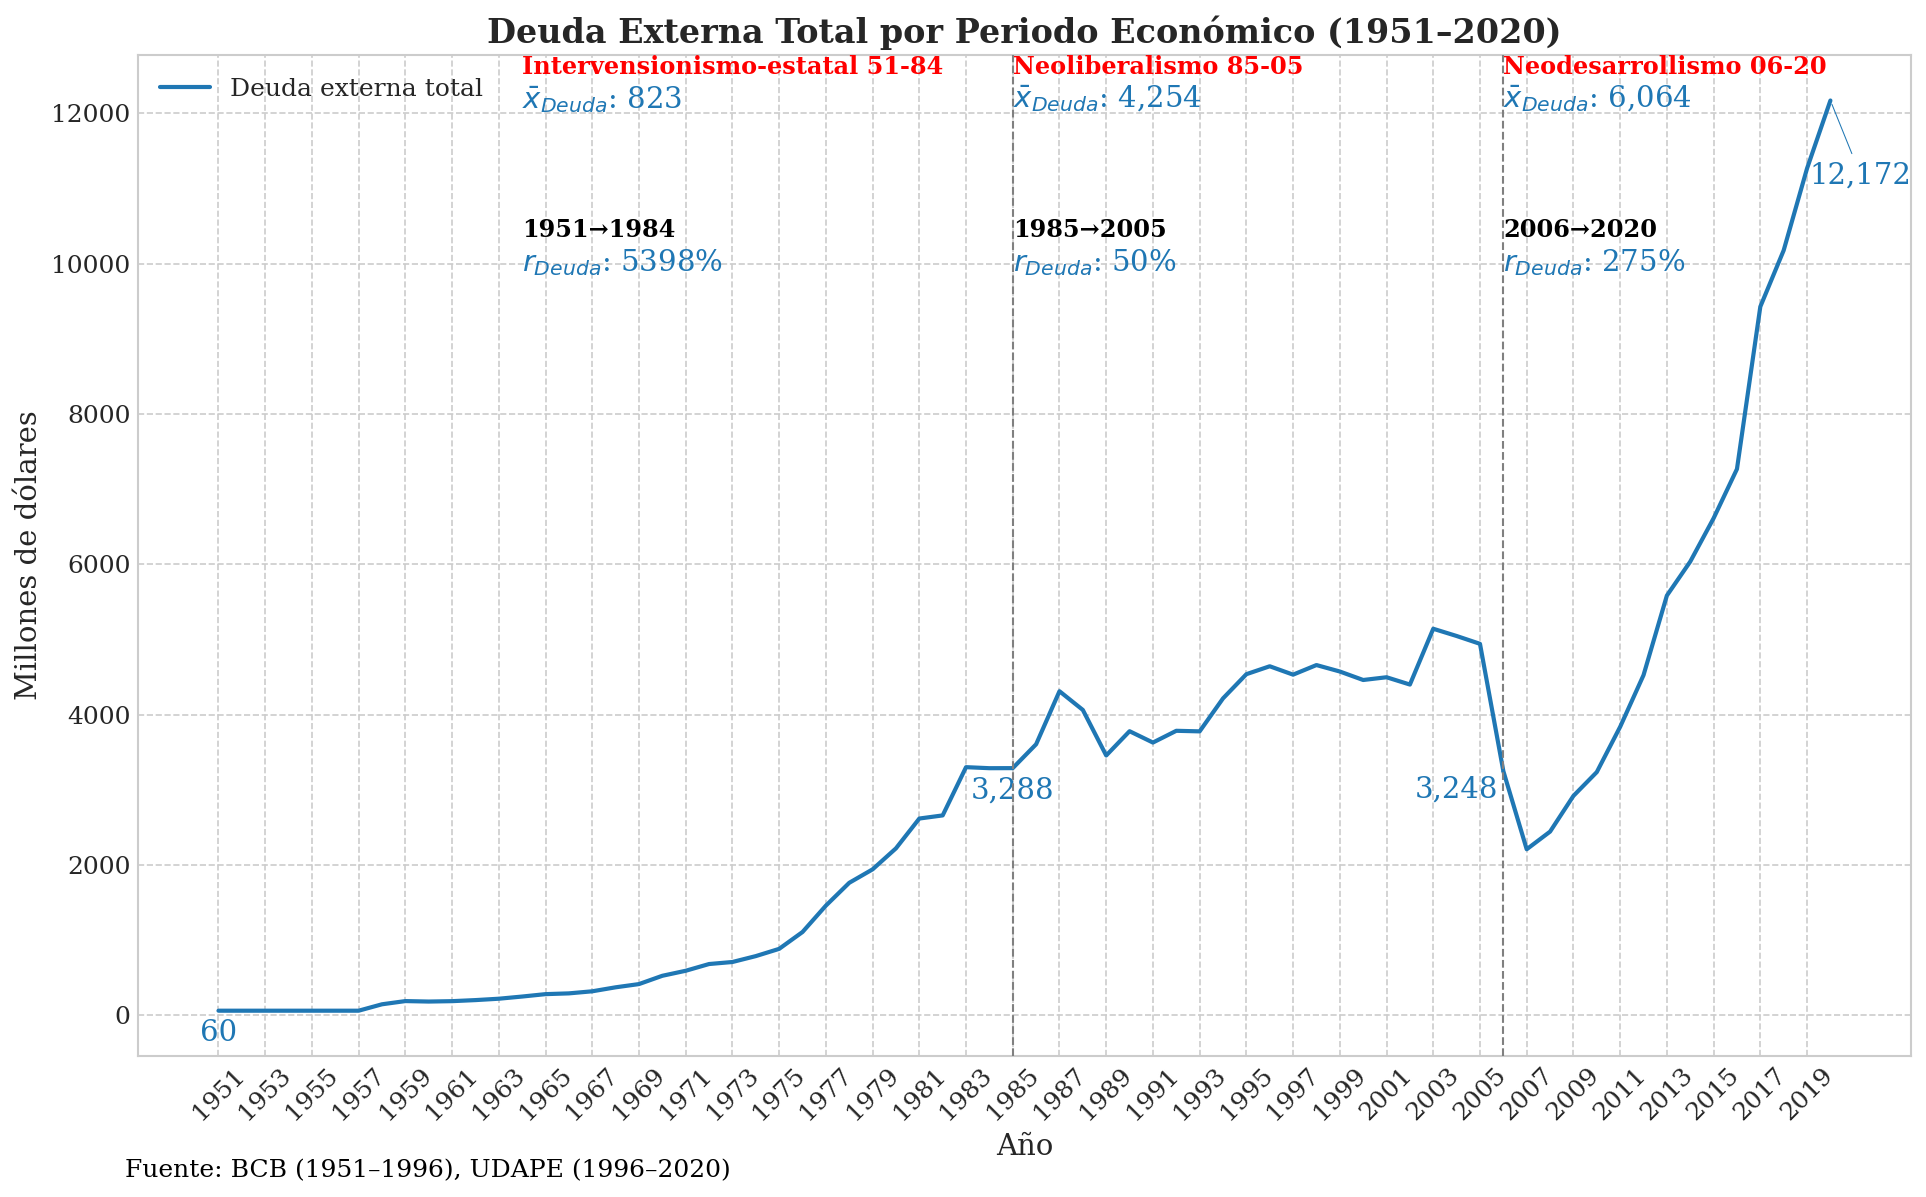

In [48]:
# ─────────────────────────────────────────────────────────────────────
# Preparación “por periodos”
# ─────────────────────────────────────────────────────────────────────
# 1) Años anotados
annotate_years_periodos = adjust_annot_years(df, annot_years_periodos)
# 2) Ciclos periodos
CYCLES_P = adjust_cycles(df, CYCLES_PERIODOS)
cycles_stats_periodos = {
    name: df.loc[period, cols_componentes].mean().to_dict()
    for name, period in CYCLES_P.items()
}
# 3) Periodos para tasas
periodos_periodos = adjust_periods(df, periodos_tasas_periodos)


# ─────────────────────────────────────────────────────────────────────
# Offsets “periodos”
# ─────────────────────────────────────────────────────────────────────
# Offsets individuales para anotaciones por periodos
annotation_offsets_periodos = {
    'deuda': {
        1951: (0, -300),
        1985: (0, -300),
        2006: (-2, -250),
        2020: (1.3, -1000),
    }
}
hitos_offset_periodos = {y: 0.8 for y in hitos_v_periodos}
medias_offsets_periodos = {
    'Intervensionismo-estatal 51-84': (1964, 1),
    'Neoliberalismo 85-05':           (1985, 1),
    'Neodesarrollismo 06-20':         (2006, 1),
}
tasas_offsets_periodos = {
    '1951-1984': (1964, 0.83),
    '1985-2005': (1985, 0.83),
    '2006-2020': (2006, 0.83),
}

# ─────────────────────────────────────────────────────────────────────
# Gráfica “por periodos”
# ─────────────────────────────────────────────────────────────────────
fig, ax = init_base_plot(
    df,
    componentes,
    custom_colors,
    "Deuda Externa Total por Periodo Económico (1951–2020)",
    "Año",
    "Millones de dólares",
    source_text="Fuente: BCB (1951–1996), UDAPE (1996–2020)"
)

# Líneas de hitos
add_hitos(
    ax, df.index, hitos_v_periodos, hitos_offset_periodos,
    annotate_labels=tuple(), line_kwargs={'linewidth': 1.0}
)

# Medias por periodo
y_max = ax.get_ylim()[1]
add_cycle_means_multi(
    ax, cycles_stats_periodos, medias_offsets_periodos,
    abbr_map, custom_colors, line_spacing=y_max * 0.03
)

# Valores puntuales
add_year_value_annotations(
    ax, df,
    annotate_years_periodos,
    cols_componentes,
    annotation_offsets_periodos,
    custom_colors, arrow_lw=0.5
)

# Tasas de crecimiento
add_period_growth_annotations_multi(
    ax, df,
    periodos_periodos,
    cols_componentes,
    tasas_offsets_periodos,
    custom_colors,
    abbr_map
)

plt.savefig(os.path.join(output_dir, "deuda_externa_total_periodos.png"))
plt.show()
